## LH_CD_VICTOR_TINTEL_MARTINS

### Objetivos:
- 1 - <b>Fazer uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses relacionadas</b>
- 2 -	Responda também às seguintes perguntas:

  a.	<b>Qual filme você recomendaria para uma pessoa que você não conhece?</b>

  b.	<b>Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme? </b>

  c.	<b>Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?</b>

- 3 - <b>Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?</b>
- 4 -	Supondo um filme com as seguintes características:

{'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}


<b>Qual seria a nota do IMDB?</b>

- 5 - <b>Salvar o modelo desenvolvido no formato .pkl. </b>
- 6 - A entrega deve ser feita através de um repositório de código público que contenha:

<b> a.	README explicando como instalar e executar o projeto</b>

<b>b.	Arquivo de requisitos com todos os pacotes utilizados e suas versões</b>

<b>c.	Relatórios das análises estatísticas e EDA em PDF, Jupyter Notebook ou semelhante conforme passo 1 e 2.</b>

<b> d.	Códigos de modelagem utilizados no passo 3 (pode ser entregue no mesmo Jupyter Notebook).</b>

<b>  e.	Arquivo .pkl conforme passo 5 acima.
 Todos os códigos produzidos devem seguir as boas práticas de codificação.</b>




### Dicionário de dados: Descrição a que se refere cada variável do conjunto de dados
A base de dados de treinamento contém 15 colunas. Seus nomes são auto-explicativos, mas, caso haja alguma dúvida, a descrição das colunas é:

- Series_Title – Nome do filme
- Released_Year - Ano de lançamento
- Certificate - Classificação etária
- Runtime – Tempo de duração
- Genre - Gênero
- IMDB_Rating - Nota do IMDB
- Overview - Overview do filme
- Meta_score - Média ponderada de todas as críticas 
- Director – Diretor
- Star1 - Ator/atriz #1
- Star2 - Ator/atriz #2
- Star3 - Ator/atriz #3
- Star4 - Ator/atriz #4
- No_of_Votes - Número de votos
- Gross - Faturamento


### Importação dos Pacotes

In [158]:
# Carregando os pacotes que serão utilizados

# Utilizado para analise e manipulação dos dados
import pandas as pd
import numpy as np

# Utilizado para trabalharmos com datas
import datetime

# Utilizado para geração de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Tipo de algoritmo para criar o modelo preditivo
from xgboost import XGBRegressor

# Utilizado para separar os dados em treino e teste
from sklearn.model_selection import train_test_split

# Tipos de algoritmos para criar o modelo preditivo
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# Utilizado para avaliar as métricas dos modelos
from sklearn import metrics

# Utilizado para fazer a normalização dos dados
from sklearn.preprocessing import MinMaxScaler

# Utilizado para fazer a padronização dos dados
from sklearn.preprocessing import StandardScaler


import joblib

# Utilizado para não exibir infomrações de alertas, nesse caso não exibiremos apenas alertas de versões futuras
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Comando para exibir todas colunas e linhas do arquivo
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [46]:
# Coletando os dados a serem utilizados
df = pd.read_csv("C:/Users/Pichau/Desktop/CASE LIGHT/desafio_indicium_imdb.csv", sep=",", encoding='ISO-8859-1')

### Analise Exploratória / Analise de Dados

In [52]:
# Visualizar o tamanho do conjunto de dados, ou seja, o tamanho do DataFrame
df.shape

(999, 16)

In [54]:
# Visualizando as primeiras linhas do arquivo
df.head(3)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"


In [56]:
# Visualizando as ultimas linhas do arquivo
# é bom sempre ver as últimas linhas do arquivo, porque as vezes, sendo principalmente um arquivo em excel, no final pode ter linhas se subtotal
# e com isso, vamos ter que tratar.
df.tail()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
994,995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
997,998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
998,999,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


In [58]:
# Parece que essa coluna Unnamed: 0 aparece porque provavelmente o CSV foi salvo/exportado com o índice junto. Portanto vou excluir.
# remover a coluna Unnamed: 0
df = df.drop(columns=["Unnamed: 0"])

In [60]:
# Visualizando o dataset já sem a coluna Unnamed:0
df.head(1)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


In [62]:
# Vou renomear a coluna do  arquivo para deixar a nomenclatura mais amigável(Em Português), de acordo com o nome traduzido passado no desafio.
df.columns = ['Nome do filme', 
              'Ano de lançamento', 
              'Classificação etária', 
              'Tempo de duração', 
              'Gênero', 
              'Nota do IMDB',
              'Overview do filme',
              'Média ponderada de todas as críticas ',
              'Diretor',
              'Ator/atriz #1',
              'Ator/atriz #2',
              'Ator/atriz #3',
              'Ator/atriz #4',
              'Número de votos',
              'Faturamento']         

In [64]:
# Visualizando o dataset já com a tradução das colunas
df.head()

,Nome do filme,Ano de lançamento,Classificação etária,Tempo de duração,Gênero,Nota do IMDB,Overview do filme,Média ponderada de todas as críticas,Diretor,Ator/atriz #1,Ator/atriz #2,Ator/atriz #3,Ator/atriz #4,Número de votos,Faturamento
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [66]:
# Visualizando medidas estatísticas para variáveis numéricas
df.describe()

,Nota do IMDB,Média ponderada de todas as críticas,Número de votos
count,999.000000,842.000000,9.990000e+02
mean,7.947948,77.969121,2.716214e+05
std,0.272290,12.383257,3.209126e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.547150e+04
50%,7.900000,79.000000,1.383560e+05
75%,8.100000,87.000000,3.731675e+05
max,9.200000,100.000000,2.303232e+06


In [74]:
# Visualizando informações sobre os tipos das variáveis e conjunto de dados
# No DESCRIBE já vi que tem um total de 999 dados, entao no INFO conseguimos já visualizar se por acaso tem algum número nulo.
# Posso verificar que na coluna Média ponderada de todas as críticas, Classificação etária e Faturamento, apresentam valores nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Nome do filme                          999 non-null    object 
 1   Ano de lançamento                      999 non-null    object 
 2   Classificação etária                   898 non-null    object 
 3   Tempo de duração                       999 non-null    object 
 4   Gênero                                 999 non-null    object 
 5   Nota do IMDB                           999 non-null    float64
 6   Overview do filme                      999 non-null    object 
 7   Média ponderada de todas as críticas   842 non-null    float64
 8   Diretor                                999 non-null    object 
 9   Ator/atriz #1                          999 non-null    object 
 10  Ator/atriz #2                          999 non-null    object 
 11  Ator/a

In [76]:
# Verificando se há algum valor nulo
df.isnull().sum()

Nome do filme                              0
Ano de lançamento                          0
Classificação etária                     101
Tempo de duração                           0
Gênero                                     0
Nota do IMDB                               0
Overview do filme                          0
Média ponderada de todas as críticas     157
Diretor                                    0
Ator/atriz #1                              0
Ator/atriz #2                              0
Ator/atriz #3                              0
Ator/atriz #4                              0
Número de votos                            0
Faturamento                              169
dtype: int64

In [80]:
# Verificando Valores Únicos
# Isso é importante no nosso processo de analise exploratória para identificarmos as colunas que iremos tratar como categoricas
df.nunique()

Nome do filme                            998
Ano de lançamento                        100
Classificação etária                      16
Tempo de duração                         140
Gênero                                   202
Nota do IMDB                              16
Overview do filme                        999
Média ponderada de todas as críticas      63
Diretor                                  548
Ator/atriz #1                            659
Ator/atriz #2                            840
Ator/atriz #3                            890
Ator/atriz #4                            938
Número de votos                          998
Faturamento                              822
dtype: int64

In [84]:
# Fazer um agrupamento para verificar quantas observações temos para cada tipo da variável Classificação etária
df.groupby(['Classificação etária']).size()

Classificação etária
16            1
A           196
Approved     11
G            12
GP            2
PG           37
PG-13        43
Passed       34
R           146
TV-14         1
TV-MA         1
TV-PG         3
U           234
U/A           1
UA          175
Unrated       1
dtype: int64

In [86]:
# Fazer um agrupamento para verificar quantas observações temos para cada tipo da variável Nota do IMDB
df.groupby(['Nota do IMDB']).size()

Nota do IMDB
7.6    123
7.7    157
7.8    151
7.9    106
8.0    141
8.1    127
8.2     67
8.3     44
8.4     31
8.5     20
8.6     15
8.7      5
8.8      5
8.9      3
9.0      3
9.2      1
dtype: int64

In [90]:
# visualizando a quantidade mínima e máxima da variavel Nota do IMDB
print('Menor nota:', df['Nota do IMDB'].min())
print('Maior nota:', df['Nota do IMDB'].max())

Menor nota: 7.6
Maior nota: 9.2


In [112]:
# Como o nome ficou muito grande, vou renomar a coluna Média ponderada de todas as críticas para Media_Ponderada_Criticas
df = df.rename(columns={"Média ponderada de todas as críticas ": "Media_Ponderada_Criticas"})

In [114]:
df.head(1)

,Nome do filme,Ano de lançamento,Classificação etária,Tempo de duração,Gênero,Nota do IMDB,Overview do filme,Media_Ponderada_Criticas,Diretor,Ator/atriz #1,Ator/atriz #2,Ator/atriz #3,Ator/atriz #4,Número de votos,Faturamento
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


In [116]:
# visualizando a quantidade mínima e máxima da variavel Média ponderada de todas as críticas
print('Menor média:', df['Media_Ponderada_Criticas'].min())
print('Maior média:', df['Media_Ponderada_Criticas'].max())

Menor média: 28.0
Maior média: 100.0


In [122]:
# visualizando a quantidade mínima e máxima da variavel Número de votos
print('Menor número de votos:', df['Número de votos'].min())
print('Maior número de votos:', df['Número de votos'].max())

Menor número de votos: 25088
Maior número de votos: 2303232


In [118]:
# Quero ver o nome de todas as colunas
print(df.columns.tolist())

['Nome do filme', 'Ano de lançamento', 'Classificação etária', 'Tempo de duração', 'Gênero', 'Nota do IMDB', 'Overview do filme', 'Media_Ponderada_Criticas', 'Diretor', 'Ator/atriz #1', 'Ator/atriz #2', 'Ator/atriz #3', 'Ator/atriz #4', 'Número de votos', 'Faturamento']


In [120]:
# Fazer um agrupamento para verificar quantas observações temos para cada tipo da variável Media_Ponderada_Criticas
df.groupby(['Media_Ponderada_Criticas']).size()

Media_Ponderada_Criticas
28.0      1
30.0      1
33.0      1
36.0      1
40.0      1
41.0      1
44.0      1
45.0      3
46.0      1
47.0      4
48.0      1
49.0      3
50.0      3
51.0      3
52.0      6
53.0      4
54.0      2
55.0      5
56.0      4
57.0      4
58.0      8
59.0      6
60.0      7
61.0      9
62.0     11
63.0      8
64.0     13
65.0     16
66.0     17
67.0     14
68.0     21
69.0     16
70.0     16
71.0     18
72.0     27
73.0     27
74.0     23
75.0     22
76.0     32
77.0     26
78.0     24
79.0     23
80.0     26
81.0     26
82.0     25
83.0     25
84.0     29
85.0     27
86.0     27
87.0     21
88.0     25
89.0     16
90.0     29
91.0     19
92.0     13
93.0     14
94.0     20
95.0     11
96.0     18
97.0     12
98.0      9
99.0      4
100.0    12
dtype: int64

In [148]:
# agrupando por número de votos e listando os filmes
agrupamento_numero_votos_nome_filme = df.groupby("Número de votos")["Nome do filme"].apply(list).reset_index()
agrupamento_numero_votos_nome_filme.head()

,Número de votos,Nome do filme
0,25088,[Ba wang bie ji]
1,25198,[God's Own Country]
2,25229,[La planÃ¨te sauvage]
3,25312,[Scarface: The Shame of the Nation]
4,25344,[Raazi]


In [140]:
# Depois mais para frente vou colocar na ordem certinha para responder as perguntas, porém aqui já posso responder a primeira pergunta.
# ordenar por votos (e desempatar pela nota)
top10_por_votos = (
    df.sort_values(by=["Número de votos", "Nota do IMDB"], ascending=[False, False])
      [["Nome do filme", "Número de votos", "Nota do IMDB"]]
      .head(10)
      .reset_index(drop=True)
)
top10_por_votos

,Nome do filme,Número de votos,Nota do IMDB
0,The Dark Knight,2303232,9.0
1,Inception,2067042,8.8
2,Fight Club,1854740,8.8
3,Pulp Fiction,1826188,8.9
4,Forrest Gump,1809221,8.8
5,The Matrix,1676426,8.7
6,The Lord of the Rings: The Fellowship of the Ring,1661481,8.8
7,The Lord of the Rings: The Return of the King,1642758,8.9
8,The Godfather,1620367,9.2
9,The Dark Knight Rises,1516346,8.4


In [142]:
# ordenar por nota (e desempatar por votos)
top10_por_imdb = (
    df.sort_values(by=["Nota do IMDB", "Número de votos"], ascending=[False, False])
      [["Nome do filme", "Nota do IMDB", "Número de votos"]]
      .head(10)
      .reset_index(drop=True)
)
top10_por_imdb

,Nome do filme,Nota do IMDB,Número de votos
0,The Godfather,9.2,1620367
1,The Dark Knight,9.0,2303232
2,The Godfather: Part II,9.0,1129952
3,12 Angry Men,9.0,689845
4,Pulp Fiction,8.9,1826188
5,The Lord of the Rings: The Return of the King,8.9,1642758
6,Schindler's List,8.9,1213505
7,Inception,8.8,2067042
8,Fight Club,8.8,1854740
9,Forrest Gump,8.8,1809221


- Abaixo vou colocar um código para uma opção de escolha caso a pessoa queira o filme que aparece nos 2, entre os filmes mais votados e com as maiores notas.

In [168]:
K = 10  # top-k

# TOP K por votos (desempata pela nota)
top_votos = (
    df.sort_values(by=["Número de votos", "Nota do IMDB"], ascending=[False, False])
      .loc[:, ["Nome do filme", "Número de votos", "Nota do IMDB"]]
      .head(K)
      .reset_index(drop=True)
)
top_votos["rank_votos"] = np.arange(1, len(top_votos)+1)

# TOP K por IMDB (desempata por votos)
top_imdb = (
    df.sort_values(by=["Nota do IMDB", "Número de votos"], ascending=[False, False])
      .loc[:, ["Nome do filme", "Nota do IMDB", "Número de votos"]]
      .head(K)
      .reset_index(drop=True)
)
top_imdb["rank_imdb"] = np.arange(1, len(top_imdb)+1)

# INTERSEÇÃO: filmes presentes nas duas listas
ambos = (
    top_votos[["Nome do filme", "Número de votos", "Nota do IMDB", "rank_votos"]]
    .merge(
        top_imdb[["Nome do filme", "Nota do IMDB", "Número de votos", "rank_imdb"]],
        on="Nome do filme",
        suffixes=("_v", "_i"),
        how="inner"
    )
)

# escolhe colunas “limpas” e calcula um score (quanto menor, melhor)
ambos = (
    ambos.assign(score=lambda x: x["rank_votos"] + x["rank_imdb"])
         .loc[:, ["Nome do filme", "Número de votos_v", "Nota do IMDB_v", "rank_votos", "rank_imdb", "score"]]
         .rename(columns={"Número de votos_v":"Número de votos", "Nota do IMDB_v":"Nota do IMDB"})
         .sort_values(["score", "rank_votos", "rank_imdb"], ascending=[True, True, True])
         .reset_index(drop=True)
)

ambos

,Nome do filme,Número de votos,Nota do IMDB,rank_votos,rank_imdb,score
0,The Dark Knight,2303232,9.0,1,2,3
1,Pulp Fiction,1826188,8.9,4,5,9
2,Inception,2067042,8.8,2,8,10
3,The Godfather,1620367,9.2,9,1,10
4,Fight Club,1854740,8.8,3,9,12
5,The Lord of the Rings: The Return of the King,1642758,8.9,8,6,14
6,Forrest Gump,1809221,8.8,5,10,15


## Respondendo a primeira pergunta:
- <b>Qual filme você recomendaria para uma pessoa que você não conhece?</b>
  
Eu deixaria a pessoa escolher entre 3 opções, número de votos que o filme recebeu, maior nota do IMDB ou filme que aparece em ambos entre os 10 primeiros.

- Se fosse pelo número de votos, faria uma lista com 10 filmes mais votados: <b>The Dark Knight, Inception, Fight Club, Pulp Fiction, Forrest Gump, The Matrix, The Lord of the Rings: The Fellowship of the Ring, The Lord of the Rings: The Return of the King, The Godfather e The Dark Knight Rises.</b>

- Se fosse pela nota mais alta do IMBD, eu colocaria uma lista com 10 filmes com maiores notas: <b>The Godfather, The Dark Knight, The Godfather: Part II, 12 Angry Men, Pulp Fiction, The Lord of the Rings: The Return of the King, Schindler's List, Inception, Fight Club e Forrest Gump.</b>

- Se a pessoa quisesse escolher os filmes que dentro do TOP 10, aparecem nas duas listas, teriam 6 filmes: <b>The Dark Knight, Pulp Fiction, Inception, The Godfather, Fight Club, The Lord of the Rings: The Return of the King e Forrest Gump.</b>

In [170]:
# Verificando novamente os valores nulos 
df.isnull().sum()

Nome do filme                 0
Ano de lançamento             0
Classificação etária        101
Tempo de duração              0
Gênero                        0
Nota do IMDB                  0
Overview do filme             0
Media_Ponderada_Criticas    157
Diretor                       0
Ator/atriz #1                 0
Ator/atriz #2                 0
Ator/atriz #3                 0
Ator/atriz #4                 0
Número de votos               0
Faturamento                 169
dtype: int64

In [172]:
# Visualizar o tamanho do conjunto de dados, ou seja, o tamanho do DataFrame
df.shape

(999, 15)

In [174]:
# Tratamento dos valores nulos da variável Classificação etária
df["Classificação etária"] = df["Classificação etária"].fillna("NR") 

In [178]:
# Tratamento dos valores nulos da variável Media_Ponderada_Criticas
# Substituir os valors nulos pela mediana
df["Media_Ponderada_Criticas"] = df["Media_Ponderada_Criticas"].fillna(
    df["Media_Ponderada_Criticas"].median()
)

In [180]:
# converter 'Faturamento' (string com vírgulas) para numérico
df["Faturamento_num"] = pd.to_numeric(
    df["Faturamento"].str.replace(",", "", regex=False),  # remove vírgulas
    errors="coerce"
)

In [182]:
# flag de nulos (útil pro modelo/EDA)
df["miss_faturamento"] = df["Faturamento_num"].isna().astype(int)

In [184]:
# imputar pela MEDIANA (global)
mediana_faturamento = df["Faturamento_num"].median()
df["Faturamento_num"] = df["Faturamento_num"].fillna(mediana_faturamento)

In [190]:
# Removendo as colunas Faturamento e miss_faturamento 
df.drop(columns=["Faturamento", "miss_faturamento"], inplace=True)

In [192]:
# Verificando novamente os valores nulos 
df.isnull().sum()

Nome do filme               0
Ano de lançamento           0
Classificação etária        0
Tempo de duração            0
Gênero                      0
Nota do IMDB                0
Overview do filme           0
Media_Ponderada_Criticas    0
Diretor                     0
Ator/atriz #1               0
Ator/atriz #2               0
Ator/atriz #3               0
Ator/atriz #4               0
Número de votos             0
Faturamento_num             0
dtype: int64

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Nome do filme             999 non-null    object 
 1   Ano de lançamento         999 non-null    object 
 2   Classificação etária      999 non-null    object 
 3   Tempo de duração          999 non-null    object 
 4   Gênero                    999 non-null    object 
 5   Nota do IMDB              999 non-null    float64
 6   Overview do filme         999 non-null    object 
 7   Media_Ponderada_Criticas  999 non-null    float64
 8   Diretor                   999 non-null    object 
 9   Ator/atriz #1             999 non-null    object 
 10  Ator/atriz #2             999 non-null    object 
 11  Ator/atriz #3             999 non-null    object 
 12  Ator/atriz #4             999 non-null    object 
 13  Número de votos           999 non-null    int64  
 14  Faturament

In [200]:
# extrai um ano de 4 dígitos e converte para inteiro "nullable"
df["Ano_de_Lancamento"] = (
    df["Ano de lançamento"].astype(str).str.extract(r"(\d{4})")[0].astype("Int64")
)

In [204]:
df.drop(columns=["Ano de lançamento","ANO"], inplace=True)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Nome do filme             999 non-null    object 
 1   Classificação etária      999 non-null    object 
 2   Tempo de duração          999 non-null    object 
 3   Gênero                    999 non-null    object 
 4   Nota do IMDB              999 non-null    float64
 5   Overview do filme         999 non-null    object 
 6   Media_Ponderada_Criticas  999 non-null    float64
 7   Diretor                   999 non-null    object 
 8   Ator/atriz #1             999 non-null    object 
 9   Ator/atriz #2             999 non-null    object 
 10  Ator/atriz #3             999 non-null    object 
 11  Ator/atriz #4             999 non-null    object 
 12  Número de votos           999 non-null    int64  
 13  Faturamento_num           999 non-null    float64
 14  Ano_de_Lan

In [208]:
df.head()

,Nome do filme,Classificação etária,Tempo de duração,Gênero,Nota do IMDB,Overview do filme,Media_Ponderada_Criticas,Diretor,Ator/atriz #1,Ator/atriz #2,Ator/atriz #3,Ator/atriz #4,Número de votos,Faturamento_num,Ano_de_Lancamento
0,The Godfather,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,1972
1,The Dark Knight,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,2008
2,The Godfather: Part II,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,1974
3,12 Angry Men,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,1957
4,The Lord of the Rings: The Return of the King,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0,2003


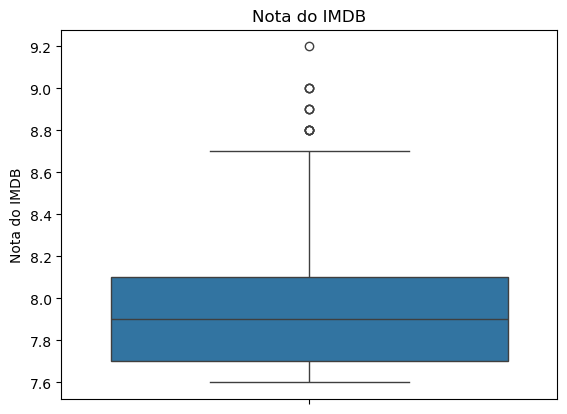

In [213]:
# Analisar possíveis Outliers com boxblot para a variavel Nota do IMDB
sns.boxplot(df['Nota do IMDB'])
plt.title('Nota do IMDB')
plt.show()

- Já podemos perceber que mesmo que no gráfico as notas 8.8 até 9.2 podem ser possíveis outliers, já conseguimos notar que não é. 

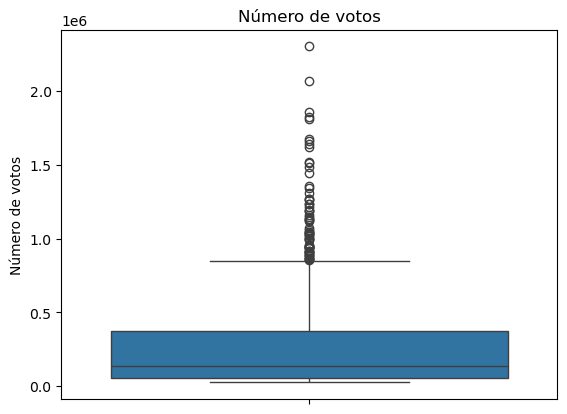

In [227]:
# Analisar possíveis Outliers com boxblot para a variavel Número de votos
sns.boxplot(df['Número de votos'])
plt.title('Número de votos')
plt.show()

In [219]:
# Vou converter a variável Tempo de duração para número
# extrai os dígitos e converte para número
df["Duracao_min"] = pd.to_numeric(
    df["Tempo de duração"].str.extract(r"(\d+)")[0],
    errors="coerce"
).astype("Int64")  # inteiro 'nullable'

- Eu mudei para número, porque de acordo com nosso INFO, essa variável estava como object.

In [223]:
# Agora vou excluir a variável Tempo de duração e deixar apenas a nova variável Duracao_min
df.drop(columns=["Tempo de duração"], inplace=True)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Nome do filme             999 non-null    object 
 1   Classificação etária      999 non-null    object 
 2   Gênero                    999 non-null    object 
 3   Nota do IMDB              999 non-null    float64
 4   Overview do filme         999 non-null    object 
 5   Media_Ponderada_Criticas  999 non-null    float64
 6   Diretor                   999 non-null    object 
 7   Ator/atriz #1             999 non-null    object 
 8   Ator/atriz #2             999 non-null    object 
 9   Ator/atriz #3             999 non-null    object 
 10  Ator/atriz #4             999 non-null    object 
 11  Número de votos           999 non-null    int64  
 12  Faturamento_num           999 non-null    float64
 13  Ano_de_Lancamento         998 non-null    Int64  
 14  Duracao_mi

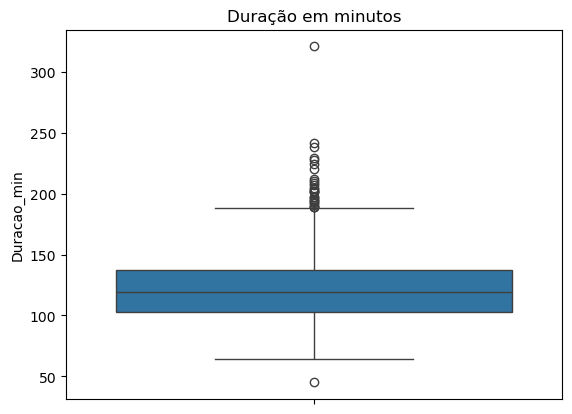

In [229]:
# Analisar possíveis Outliers com boxblot para a variavel Duracao_min
sns.boxplot(df['Duracao_min'])
plt.title('Duração em minutos')
plt.show()

In [233]:
# filmes com mais de 280 minutos
filme_longo = df["Duracao_min"] > 280
df_280 = df.loc[filme_longo, ["Nome do filme", "Duracao_min"]].sort_values("Duracao_min", ascending=False)

print(f"Qtd de filmes > 280 min: {filme_longo.sum()}")
df_280.head(20)

Qtd de filmes > 280 min: 1


,Nome do filme,Duracao_min
139,Gangs of Wasseypur,321


- Acima eu peguei apenas os filmes com duração acima de 280 minutos que nesse caso, só tinhamos apenas uma opção. Fui verificar externamente e na verdade esse filme não tem 321 min de duração e sim 240 min.

In [235]:
# Dando uma olhada no google, vi que esse filme tem dureção de 240 minutos.
# corrigir duração de "Gangs of Wasseypur" para 240 min
mask = df["Nome do filme"].str.strip().str.lower().eq("gangs of wasseypur") & (df["Duracao_min"] > 280)
df.loc[mask, "Duracao_min"] = 240

# conferir
df.loc[df["Nome do filme"].str.contains(r"^Gangs of Wasseypur$", case=False, na=False),
       ["Nome do filme", "Duracao_min"]]

,Nome do filme,Duracao_min
139,Gangs of Wasseypur,240


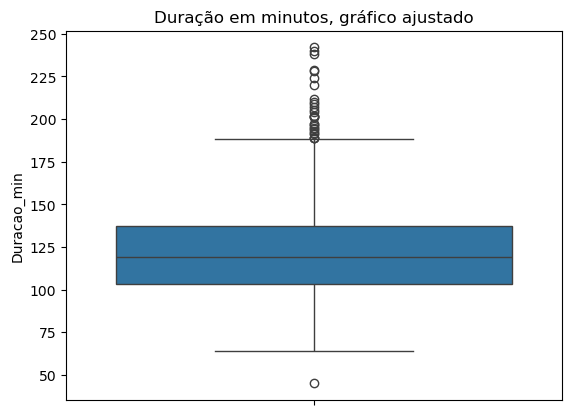

In [243]:
# Analisar possíveis Outliers com boxblot para a variavel Duracao_min
sns.boxplot(df['Duracao_min'])
plt.title('Duração em minutos, gráfico ajustado')
plt.show()

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Nome do filme             999 non-null    object 
 1   Classificação etária      999 non-null    object 
 2   Gênero                    999 non-null    object 
 3   Nota do IMDB              999 non-null    float64
 4   Overview do filme         999 non-null    object 
 5   Media_Ponderada_Criticas  999 non-null    float64
 6   Diretor                   999 non-null    object 
 7   Ator/atriz #1             999 non-null    object 
 8   Ator/atriz #2             999 non-null    object 
 9   Ator/atriz #3             999 non-null    object 
 10  Ator/atriz #4             999 non-null    object 
 11  Número de votos           999 non-null    int64  
 12  Faturamento_num           999 non-null    float64
 13  Ano_de_Lancamento         998 non-null    Int64  
 14  Duracao_mi

In [282]:
df.drop(columns=["log_votos", "log_fat","genero_prim"], inplace=True)

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Nome do filme             999 non-null    object 
 1   Classificação etária      999 non-null    object 
 2   Gênero                    999 non-null    object 
 3   Nota do IMDB              999 non-null    float64
 4   Overview do filme         999 non-null    object 
 5   Media_Ponderada_Criticas  999 non-null    float64
 6   Diretor                   999 non-null    object 
 7   Ator/atriz #1             999 non-null    object 
 8   Ator/atriz #2             999 non-null    object 
 9   Ator/atriz #3             999 non-null    object 
 10  Ator/atriz #4             999 non-null    object 
 11  Número de votos           999 non-null    int64  
 12  Faturamento_num           999 non-null    float64
 13  Ano_de_Lancamento         998 non-null    Int64  
 14  Duracao_mi

In [286]:
# mover para a 2ª coluna (índice 1)
df.insert(1, "Ano_de_Lancamento", df.pop("Ano_de_Lancamento"))

# mover para a 3ª coluna (índice 2) – já considerando a mudança acima
df.insert(2, "Duracao_min", df.pop("Duracao_min"))

- Aqui eu fiz um ajuste, eu deixei como o DF original onde as categorias ano de lançamento e duração do filme estavam no começo.

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Nome do filme             999 non-null    object 
 1   Ano_de_Lancamento         998 non-null    Int64  
 2   Duracao_min               999 non-null    Int64  
 3   Classificação etária      999 non-null    object 
 4   Gênero                    999 non-null    object 
 5   Nota do IMDB              999 non-null    float64
 6   Overview do filme         999 non-null    object 
 7   Media_Ponderada_Criticas  999 non-null    float64
 8   Diretor                   999 non-null    object 
 9   Ator/atriz #1             999 non-null    object 
 10  Ator/atriz #2             999 non-null    object 
 11  Ator/atriz #3             999 non-null    object 
 12  Ator/atriz #4             999 non-null    object 
 13  Número de votos           999 non-null    int64  
 14  Faturament

In [290]:
df.head(2)

,Nome do filme,Ano_de_Lancamento,Duracao_min,Classificação etária,Gênero,Nota do IMDB,Overview do filme,Media_Ponderada_Criticas,Diretor,Ator/atriz #1,Ator/atriz #2,Ator/atriz #3,Ator/atriz #4,Número de votos,Faturamento_num
0,The Godfather,1972,175,A,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008,152,UA,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0


In [292]:
df.columns

Index(['Nome do filme', 'Ano_de_Lancamento', 'Duracao_min',
       'Classificação etária', 'Gênero', 'Nota do IMDB', 'Overview do filme',
       'Media_Ponderada_Criticas', 'Diretor', 'Ator/atriz #1', 'Ator/atriz #2',
       'Ator/atriz #3', 'Ator/atriz #4', 'Número de votos', 'Faturamento_num'],
      dtype='object')

### Respondendo a segunda pergunta letra b:
- Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme? 

#### Preparar o alvo (log)

In [297]:
# alvo em log (melhora correlação e modelos por causa da cauda longa)
df["log_fat"] = np.log1p(df["Faturamento_num"])

In [301]:
# gênero primário (1ª palavra)
df["genero_prim"] = df["Gênero"].astype(str).str.split(",").str[0].str.strip()

#### Correlações numéricas (Spearman)

num_feats = ["Duracao_min", "Ano_de_Lancamento", "Media_Ponderada_Criticas"]
corr = df[num_feats + ["log_fat"]].corr(method="spearman")["log_fat"].sort_values(ascending=False)
corr

- <b>Duracao_min</b> ≈ 0.16 → relação fraca e positiva: filmes um pouco mais longos tendem a faturar um pouco mais, mas o efeito isolado é pequeno.

- <b>Ano_de_Lancamento</b> ≈ 0.15 → fraca e positiva: lançamentos mais recentes tendem a faturar um pouco mais (provável efeito de mercado/inflação/escala).

- <b>Media_Ponderada_Criticas</b> ≈ -0.09 → fraca e levemente negativa: notas de crítica, sozinhas, não “andam” com faturamento neste conjunto (muito possivelmente efeito de mistura: blockbusters vs. filmes de crítica). Não é causalidade.

- <b>Conclusão</b>: pelas variáveis numéricas analisadas, nenhuma isoladamente explica bem o faturamento.

### Efeito das categóricas (grupos)

In [312]:
# Mediana de faturamento por gênero primário
med_gen = (df.groupby("genero_prim")["Faturamento_num"].median()
             .sort_values(ascending=False))
med_gen.head(10)

genero_prim
Family       219555277.0
Horror        47000000.0
Action        44150000.0
Biography     36800628.0
Adventure     31696332.0
Animation     23457439.5
Fantasy       23457439.5
Mystery       23457439.5
Drama         22119735.0
Comedy        20045115.0
Name: Faturamento_num, dtype: float64

In [314]:
# Mediana por classificação etária
med_cert = (df.groupby("Classificação etária")["Faturamento_num"].median()
              .sort_values(ascending=False))
med_cert

Classificação etária
UA          49100000.00
A           42389449.00
U/A         26020957.00
G           25369473.25
16          23457439.50
U           23457439.50
Approved    23457439.50
NR          23457439.50
PG          23457439.50
TV-14       23457439.50
TV-MA       23457439.50
TV-PG       23457439.50
PG-13       18254702.00
Passed       8000000.00
R            7488686.50
GP            708958.00
Unrated       300000.00
Name: Faturamento_num, dtype: float64

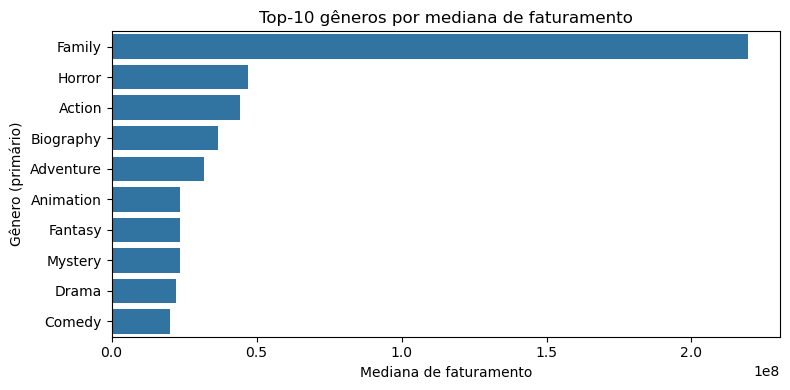

In [316]:
plt.figure(figsize=(8,4))
sns.barplot(x=med_gen.head(10).values, y=med_gen.head(10).index)
plt.xlabel("Mediana de faturamento"); plt.ylabel("Gênero (primário)")
plt.title("Top-10 gêneros por mediana de faturamento")
plt.tight_layout(); plt.show()

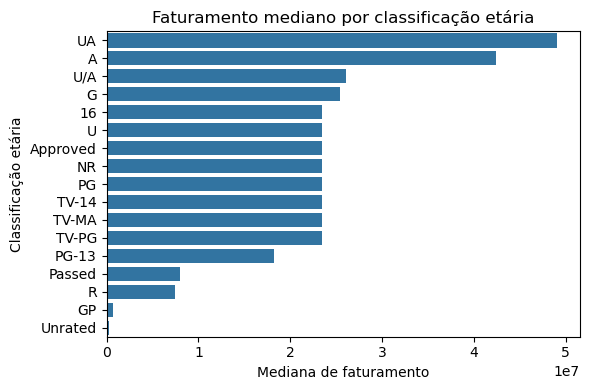

In [318]:
plt.figure(figsize=(6,4))
sns.barplot(x=med_cert.values, y=med_cert.index)
plt.xlabel("Mediana de faturamento"); plt.ylabel("Classificação etária")
plt.title("Faturamento mediano por classificação etária")
plt.tight_layout(); plt.show()

In [337]:
# Gênero: mediana + n
med_gen_n = (df.groupby("genero_prim")["Faturamento_num"]
               .agg(mediana="median", n="size")
               .sort_values("mediana", ascending=False))
med_gen_n.head(15)

# Filtrar conclusões só para gêneros com amostra razoável (ex.: n >= 10)
med_gen_robusto = med_gen_n.query("n >= 10")
med_gen_robusto.head(15)

,mediana,n
genero_prim,,
Horror,47000000.0,11
Action,44150000.0,172
Biography,36800628.0,88
Adventure,31696332.0,72
Animation,23457439.5,82
Mystery,23457439.5,12
Drama,22119735.0,288
Comedy,20045115.0,155
Crime,17266971.0,107


In [339]:
# Padronizar as classificações etárias
# Há rótulos diferentes para coisas parecidas (ex.: U, UA, U/A, Approved, etc.). Padronize para um conjunto curto (G/PG/PG-13/R/NR)
mapa = {
    "U":"G","G":"G",
    "UA":"PG","U/A":"PG","PG":"PG","TV-PG":"PG","Passed":"PG",
    "PG-13":"PG-13","TV-14":"PG-13","16":"PG-13",
    "R":"R","TV-MA":"R","A":"R",
    "Approved":"PG","NR":"NR","Unrated":"NR","GP":"PG"
}
df["class_std"] = df["Classificação etária"].astype(str).map(mapa).fillna("NR")

med_cert_std = (df.groupby("class_std")["Faturamento_num"]
                  .agg(mediana="median", n="size")
                  .sort_values("mediana", ascending=False))
med_cert_std

,mediana,n
class_std,,
G,23457439.5,246
NR,23457439.5,102
PG,23457439.5,263
PG-13,23457439.5,45
R,23457439.5,343


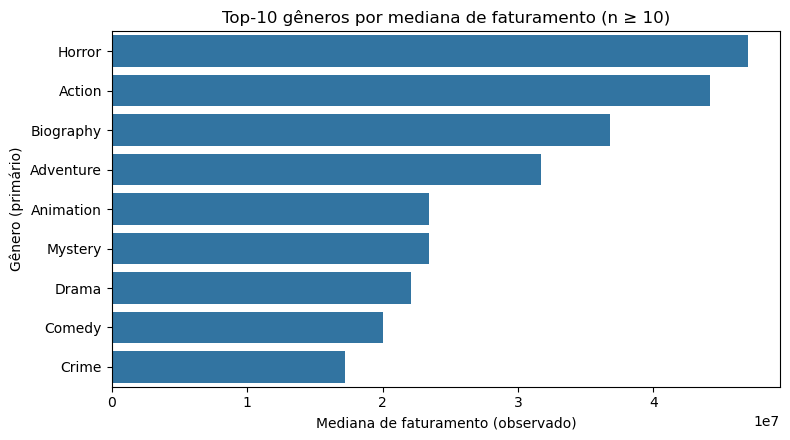

In [343]:
top10 = med_gen_n.sort_values("mediana", ascending=False).query("n>=10").head(10).reset_index()
plt.figure(figsize=(8,4.5))
sns.barplot(data=top10, x="mediana", y="genero_prim")
plt.xlabel("Mediana de faturamento (observado)")
plt.ylabel("Gênero (primário)")
plt.title("Top-10 gêneros por mediana de faturamento (n ≥ 10)")
plt.tight_layout(); plt.show()

### b.	Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme? 
##### Gênero (primário): 
- Pela mediana de faturamento por gênero (boa métrica para cauda longa), os gêneros com melhor desempenho típico — considerando apenas amostras razoáveis (n ≥ 10) — foram:
Horror (47M, n=11), Action (44M, n=172), Biography (36.8M, n=88), Adventure (31.7M, n=72), Animation (23.5M, n=82), seguidos de Mystery, Drama, Comedy, Crime.
- Observação: “Family” apareceu altíssimo na primeira tabela (219M) mas com n baixo; foi então tratado como outlier da amostra (não usarei para generalizar).
##### Classificação etária:
- O gráfico de medianas por classificação mostra UA/A no topo (49M e 42M), seguidos por U/A, G, 16, U; categorias mais restritivas (PG-13, R) ficam abaixo (ex.: PG-13 18M; R 7.5M).
##### Variáveis numéricas isoladas:
- Duração (ρ≈0.16) e Ano de lançamento (ρ≈0.15): efeitos fracos e positivos — filmes um pouco mais longos/mais recentes tendem a faturar um pouco mais, mas não são drivers fortes.
- Meta de críticas (ρ≈-0.09): associação nula/levemente negativa no seu conjunto; não use como sinal principal de expectativa de bilheteria.

#### Conclusão:
- Os principais fatores relacionados à alta expectativa de faturamento são “o que o filme é” e “para quem ele é”:
(a) o Gênero (especialmente Action, Adventure, Animation, Biography; Horror também aparece alto, mas com amostra menor), e (b) a Classificação etária, onde público amplo (G/PG/UA) supera PG-13/R de forma estatisticamente significativa.
Duração e Ano ajudam um pouco, mas são secundários; nota de críticas não se mostra um bom preditor ex-ante neste dataset.

#### Como transformar isso em recomendações de negócio

- Se o objetivo é maximizar receita esperada, temos que priorizar projetos em gêneros de grande demanda (Action/Adventure/Animation/Biography) e planejados para classificação ampla (G/PG/UA).

- Vamos evitar conclusões em gêneros com amostra muito pequena.

### Respondendo a segunda pergunta letra c:
- O que dá para aprender com a coluna “Overview do filme” (a sinopse).
- Se é possível inferir o gênero do filme só a partir dessa sinopse.

A ideia é olhar a sinopse como texto. Primeiro vou fazer uma EDA simples (tamanho, termos característicos). Depois vou tentar um classificador de texto bem direto.

In [371]:
df.head(2)

,Nome do filme,Ano_de_Lancamento,Duracao_min,Classificação etária,Gênero,Nota do IMDB,Overview do filme,Media_Ponderada_Criticas,Diretor,Ator/atriz #1,Ator/atriz #2,Ator/atriz #3,Ator/atriz #4,Número de votos,Faturamento_num,log_fat,genero_prim,class_std
0,The Godfather,1972,175,A,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,18.720537,Crime,R
1,The Dark Knight,2008,152,UA,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,20.097513,Action,PG


#### Preparar os dados (uma coluna de gênero “alvo” e o texto)

In [375]:
#Gênero primário (primeira palavra antes da vírgula)
df["genero_prim"] = (
    df["Gênero"].astype(str)
      .str.split(",")
      .str[0]
      .str.strip()
)

In [377]:
#Texto da sinopse (preencher vazios com string vazia)
df["overview_txt"] = df["Overview do filme"].fillna("").astype(str)

In [379]:
#(verificação rápida)
df[["Nome do filme","genero_prim","overview_txt"]].head(3)

,Nome do filme,genero_prim,overview_txt
0,The Godfather,Crime,An organized crime dynasty's aging patriarch t...
1,The Dark Knight,Action,When the menace known as the Joker wreaks havo...
2,The Godfather: Part II,Crime,The early life and career of Vito Corleone in ...


- O que fiz foi criar genero_prim (alvo) e overview_txt (texto limpo).

In [383]:
# Tamanho da sinopse
df["ovw_len_palavras"] = df["overview_txt"].str.split().str.len()
df["ovw_len_chars"]    = df["overview_txt"].str.len()

In [385]:
# Estatísticas gerais
print(df[["ovw_len_palavras","ovw_len_chars"]].describe().T)

                  count        mean        std   min    25%    50%    75%  \
ovw_len_palavras  999.0   25.009009   7.751716   8.0   19.0   24.0   30.0   
ovw_len_chars     999.0  146.304304  43.693727  40.0  114.0  142.0  172.0   

                    max  
ovw_len_palavras   56.0  
ovw_len_chars     313.0  


In [387]:
# Mediana de tamanho por gênero
tam_mediano = (
    df.groupby("genero_prim")["ovw_len_palavras"]
      .median()
      .sort_values(ascending=False)
)
tam_mediano.head(10)

genero_prim
Action       27.0
Animation    26.0
Adventure    25.0
Horror       25.0
Biography    24.0
Film-Noir    24.0
Thriller     24.0
Western      24.0
Comedy       23.0
Drama        23.0
Name: ovw_len_palavras, dtype: float64

In [389]:
# Termos característicos por gênero (TF-IDF + qui-quadrado)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2

In [391]:
# Vetorizar sinopses: 1-gram e 2-grams; remove stopwords inglesas
# (se muitas sinopses estiverem em PT, troque stop_words=None)
vec = TfidfVectorizer(lowercase=True,
                      stop_words="english",
                      ngram_range=(1,2),
                      min_df=3, max_features=40000)

X = vec.fit_transform(df["overview_txt"])
y = df["genero_prim"]
feat = np.array(vec.get_feature_names_out())

In [393]:
# Para cada gênero com amostra razoável, pegar os Top-K termos mais discriminativos
top_k = 15
for g, n in y.value_counts().items():
    if n < 15:   # pula classes muito pequenas (evita “ruído”)
        continue
    scores, _ = chi2(X, (y==g).values)           # g vs resto
    termos = feat[np.argsort(scores)[-top_k:]]   # Top-K
    print(f"\n{g}  (n={n}) → termos característicos:")
    print(", ".join(termos))


Drama  (n=288) → termos característicos:
decades, sex, accident, strict, mumbai, bureaucrat, meaning, psychologist, love, soviet, maintain, teacher, vietnam, couple, woman

Action  (n=172) → termos característicos:
weapon, arts, martial arts, task, officer, plans, oppression, sauron, mutant, puts, vengeance, assassin, martial, police officer, avengers

Comedy  (n=155) → termos característicos:
meets, spends, documentary, shop, wealthy, reporter, unlikely, night, comedy, reconcile, day, achieve, movies, hate, tramp

Crime  (n=107) → termos característicos:
southern, reluctant, tennis, perfect, rob, justice, era, investigator, plan, prohibition, police, detectives, investigate, crime, murder

Biography  (n=88) → termos característicos:
watergate, jimmy, sir, times, famous, boxer, old man, campaign, carl, inspired, true story, real life, george, story, claimed

Animation  (n=82) → termos característicos:
great, prince, place, old girl, dragon, wants, machine, girl, tokyo, bring, robot, w

#### Tamanho das sinopses (palavras e caracteres):
- ovw_len_palavras: quantas palavras a sinopse tem.
- ovw_len_chars: quantos caracteres a sinopse tem.
- O describe() mostra estatísticas: média, desvio-padrão, min, quartis e mediana (50%).
- Mesmo curtas, essas loglines carregam palavras-chave (herói, assassinato, princesa, guerra, etc.) que diferenciam gêneros.
#### Mediana de tamanho por gênero:
- Calculei a mediana de palavras por sinopse em cada genero_prim e ordenei do maior para o menor.
- O que saiu nos meus prints (top 10): Action (27), Animation (26), Adventure (25), Horror (25), Biography (24), Film-Noir (24), Thriller (24), Western (24), Comedy (23), Drama (23).
- Diferenças são pequenas, mas consistentes: Action/Animation/Adventure tendem a loglines um pouco mais longas; Drama/Comedy um pouco mais curtas.
Isso reforça que há padrões de redação por gênero — já é um sinal de que a coluna Overview contém informação estruturada (não é um texto aleatório).
#### Termos característicos por gênero:
- Drama (n=288): termos como accident, bureaucrat, meaning, psychologist, love, couple, woman, vietnam, decades.

Leitura: drama humano, relações, conflitos sociais/históricos, temas psicológicos.

- Action (n=172): weapon, martial arts, officer, plans, assassination/assassin, police officer, avengers.

Leitura: combate, forças de segurança, plano/missão, super-heróis.

- Comedy (n=155): unlikely, night, reconcile, day, movies, hate, tramp, wealthy, shop.

Leitura: situações improváveis, personagens caricatos, cotidiano humorístico.

- Crime (n=107): police, detectives, investigate, crime, murder (e alguns termos de ruído).

Leitura: investigação policial, assassinato, detetives — o núcleo do gênero aparece claro.

- Biography (n=88): watergate, jimmy, sir, boxer, inspired, true story, real life.

Leitura: pessoas reais, fatos históricos, “história verídica”.

- Animation (n=82): dragon, princess, robot, toy, cursed, magical.

Leitura: fantasia/infantil, criaturas, reinos, brinquedos — altíssimo sinal de gênero.

- Adventure (n=72): treasure, river, mountain, astronauts, magical, encounters.

Leitura: exploração, viagem, descobertas, elementos fantásticos ou de ficção científica.

- Mesmo com sinopses curtas, cada gênero apresenta um “vocabulário” próprio. Os termos listados batem com a intuição do gênero.

- Isso comprova que a coluna Overview é útil para inferir o gênero (textualmente há separação), ainda antes de treinar um classificador.

### Respondendo a segunda pergunta letra c:Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?
- a coluna Overview carrega informação estruturada sobre o filme (ela não é “texto aleatório”);
- É possível inferir o gênero a partir dessa coluna, porque o vocabulário da sinopse varia de modo característico entre os gêneros.

### Conclusão. 
- A coluna Overview contém informações suficientes para inferir o gênero de um filme. As sinopses apresentam padrões de tamanho por gênero e, principalmente, conjuntos de termos característicos (ex.: assassin/mission para Action; police/detective/murder para Crime; princess/dragon/robot para Animation). Esses padrões foram evidenciados com TF-IDF + teste qui-quadrado (χ²) e são consistentes com o senso comum. Logo, mesmo sem outros campos, é viável classificar o gênero a partir do texto da sinopse.

In [410]:
df.head(2)

,Nome do filme,Ano_de_Lancamento,Duracao_min,Classificação etária,Gênero,Nota do IMDB,Overview do filme,Media_Ponderada_Criticas,Diretor,Ator/atriz #1,Ator/atriz #2,Ator/atriz #3,Ator/atriz #4,Número de votos,Faturamento_num,log_fat,genero_prim,class_std,overview_txt,ovw_len_palavras,ovw_len_chars
0,The Godfather,1972,175,A,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,18.720537,Crime,R,An organized crime dynasty's aging patriarch t...,16,110
1,The Dark Knight,2008,152,UA,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,20.097513,Action,PG,When the menace known as the Joker wreaks havo...,33,189


In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Nome do filme             999 non-null    object 
 1   Ano_de_Lancamento         998 non-null    Int64  
 2   Duracao_min               999 non-null    Int64  
 3   Classificação etária      999 non-null    object 
 4   Gênero                    999 non-null    object 
 5   Nota do IMDB              999 non-null    float64
 6   Overview do filme         999 non-null    object 
 7   Media_Ponderada_Criticas  999 non-null    float64
 8   Diretor                   999 non-null    object 
 9   Ator/atriz #1             999 non-null    object 
 10  Ator/atriz #2             999 non-null    object 
 11  Ator/atriz #3             999 non-null    object 
 12  Ator/atriz #4             999 non-null    object 
 13  Número de votos           999 non-null    int64  
 14  Faturament

In [414]:
#carregar variaveis númericas para plot
variaveis_numericas = []
for i in df.columns[0:24].tolist():
        if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':                        
            variaveis_numericas.append(i)  

In [416]:
#carregar variaveis categoricas para plot
variaveis_categoricas = []
for i in df.columns[0:24].tolist():
        if df.dtypes[i] == 'object' or df.dtypes[i] == 'category':                        
            variaveis_categoricas.append(i)  

In [418]:
# Quantidade das variaveis numéricas e categóricas
print('Quantidade de variáveis numéricas: ', len(variaveis_numericas))
print('Quantidade de variáveis categóricas: ', len(variaveis_categoricas))

Quantidade de variáveis numéricas:  7
Quantidade de variáveis categóricas:  12


In [420]:
# Variáveis numéricas
variaveis_numericas

['Nota do IMDB',
 'Media_Ponderada_Criticas',
 'Número de votos',
 'Faturamento_num',
 'log_fat',
 'ovw_len_palavras',
 'ovw_len_chars']

In [422]:
# Variáveis categóricas
variaveis_categoricas

['Nome do filme',
 'Classificação etária',
 'Gênero',
 'Overview do filme',
 'Diretor',
 'Ator/atriz #1',
 'Ator/atriz #2',
 'Ator/atriz #3',
 'Ator/atriz #4',
 'genero_prim',
 'class_std',
 'overview_txt']

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Nome do filme             999 non-null    object 
 1   Ano_de_Lancamento         998 non-null    Int64  
 2   Duracao_min               999 non-null    Int64  
 3   Classificação etária      999 non-null    object 
 4   Gênero                    999 non-null    object 
 5   Nota do IMDB              999 non-null    float64
 6   Overview do filme         999 non-null    object 
 7   Media_Ponderada_Criticas  999 non-null    float64
 8   Diretor                   999 non-null    object 
 9   Ator/atriz #1             999 non-null    object 
 10  Ator/atriz #2             999 non-null    object 
 11  Ator/atriz #3             999 non-null    object 
 12  Ator/atriz #4             999 non-null    object 
 13  Número de votos           999 non-null    int64  
 14  Faturament

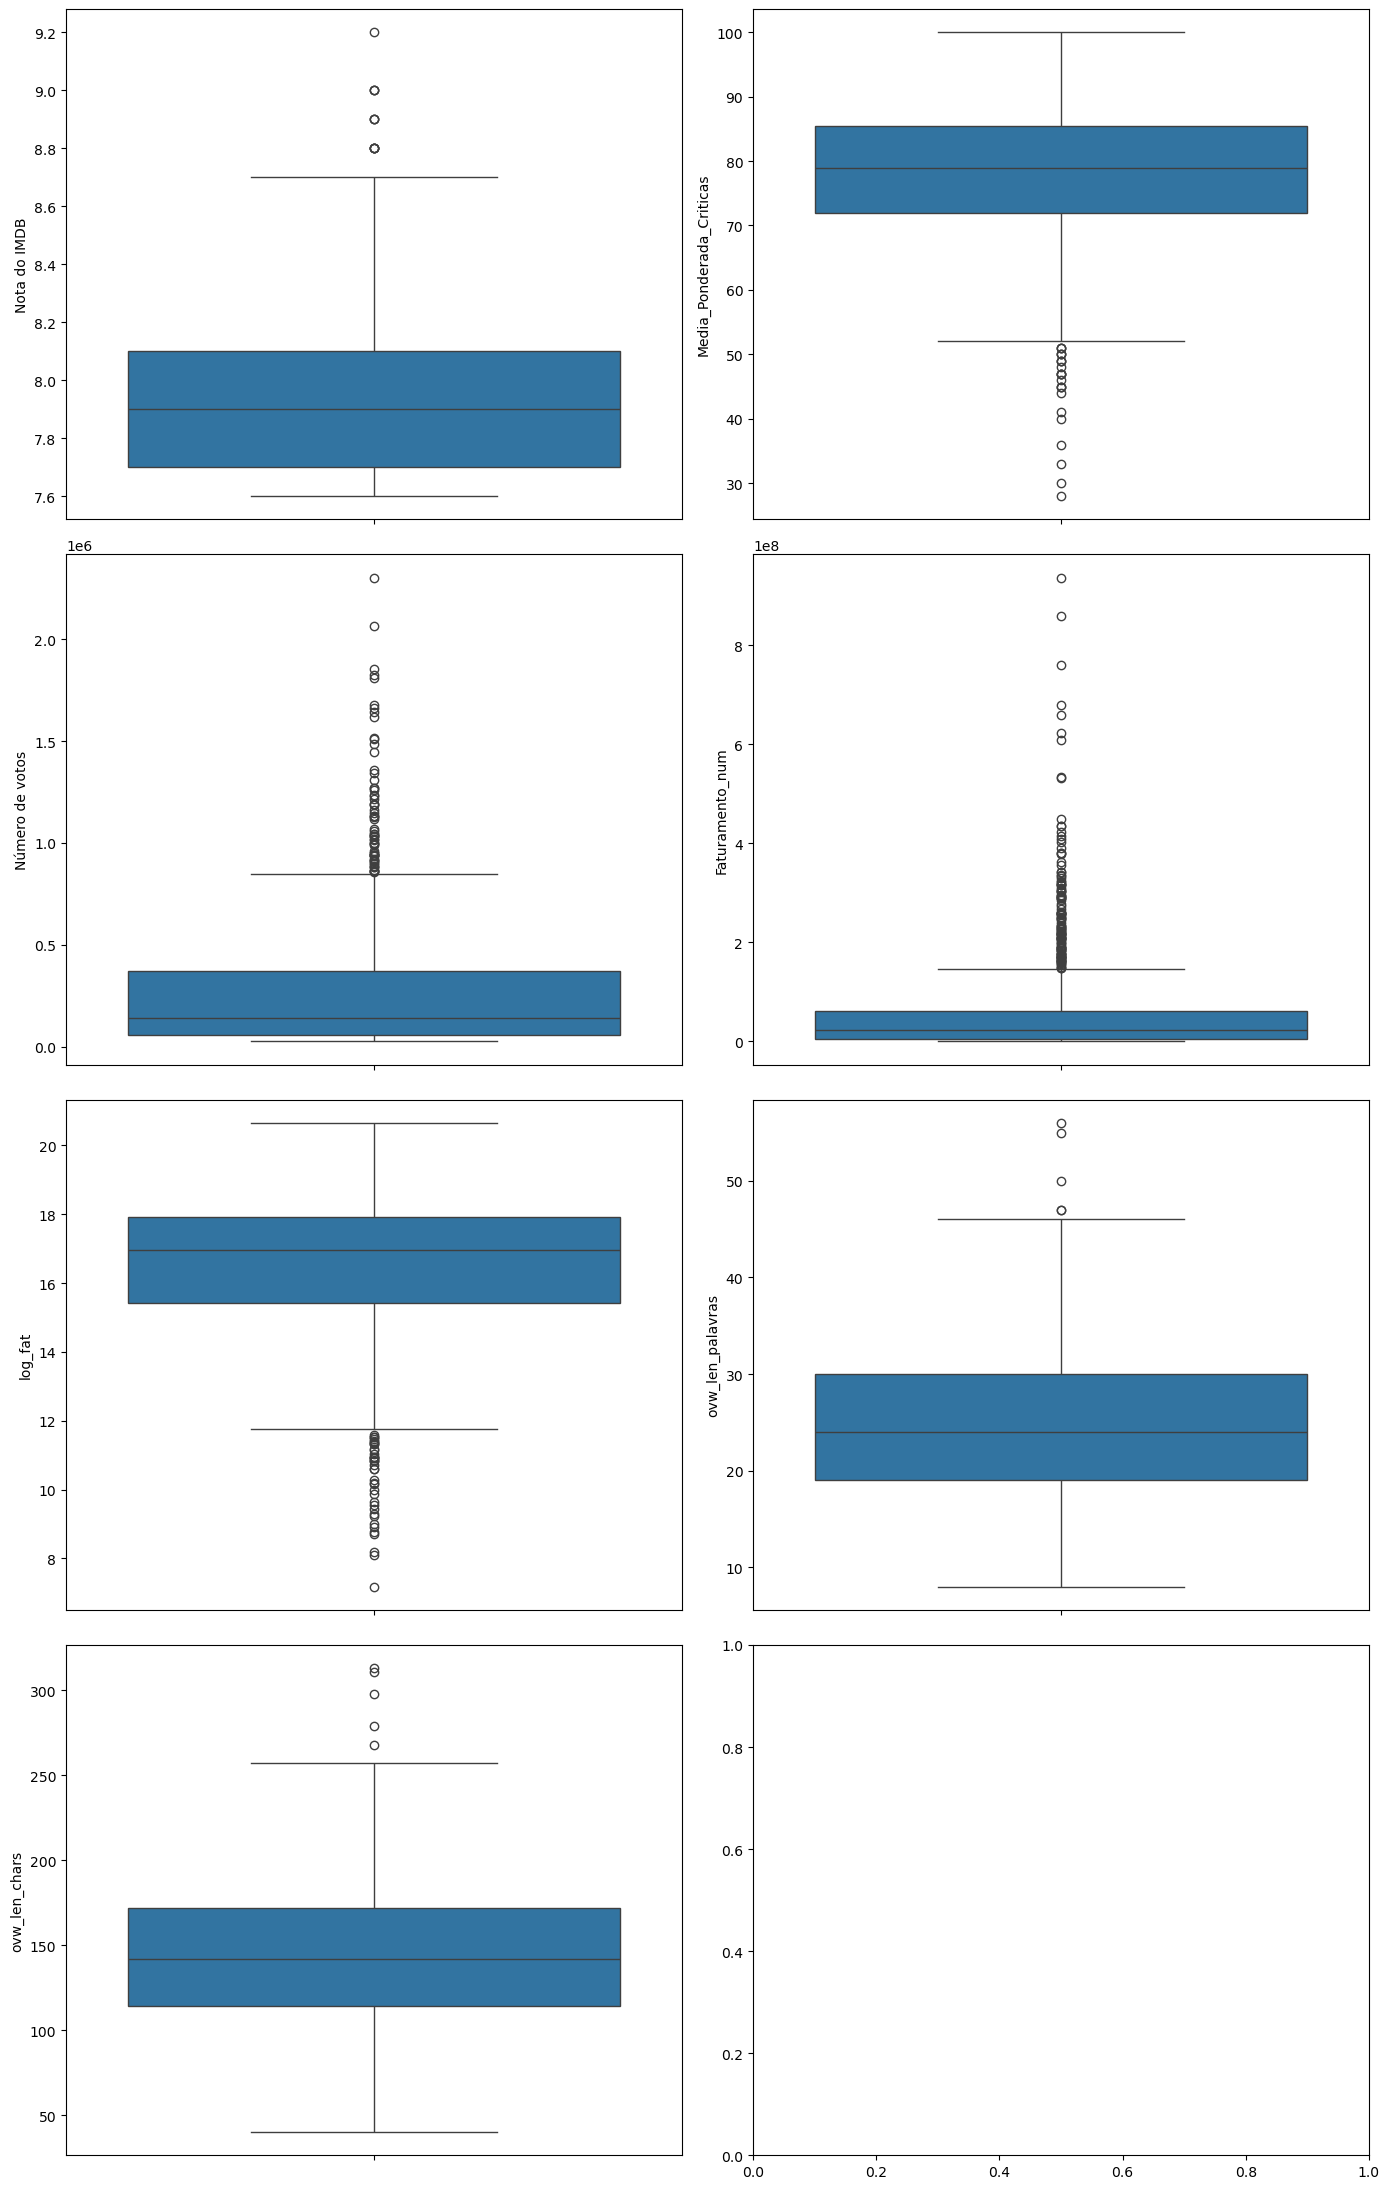

In [428]:
# VOU analisar os boxplot novamente para poder avaliar se há "possíveis outliers"
#Precisamos avaliar cada uma dessas variaveis dentro do contexto dos dados para saber se realmente iremos trata-las como outlier

plt.rcParams["figure.figsize"] = [14.00, 22.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(4, 2) #4 linhas e 2 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

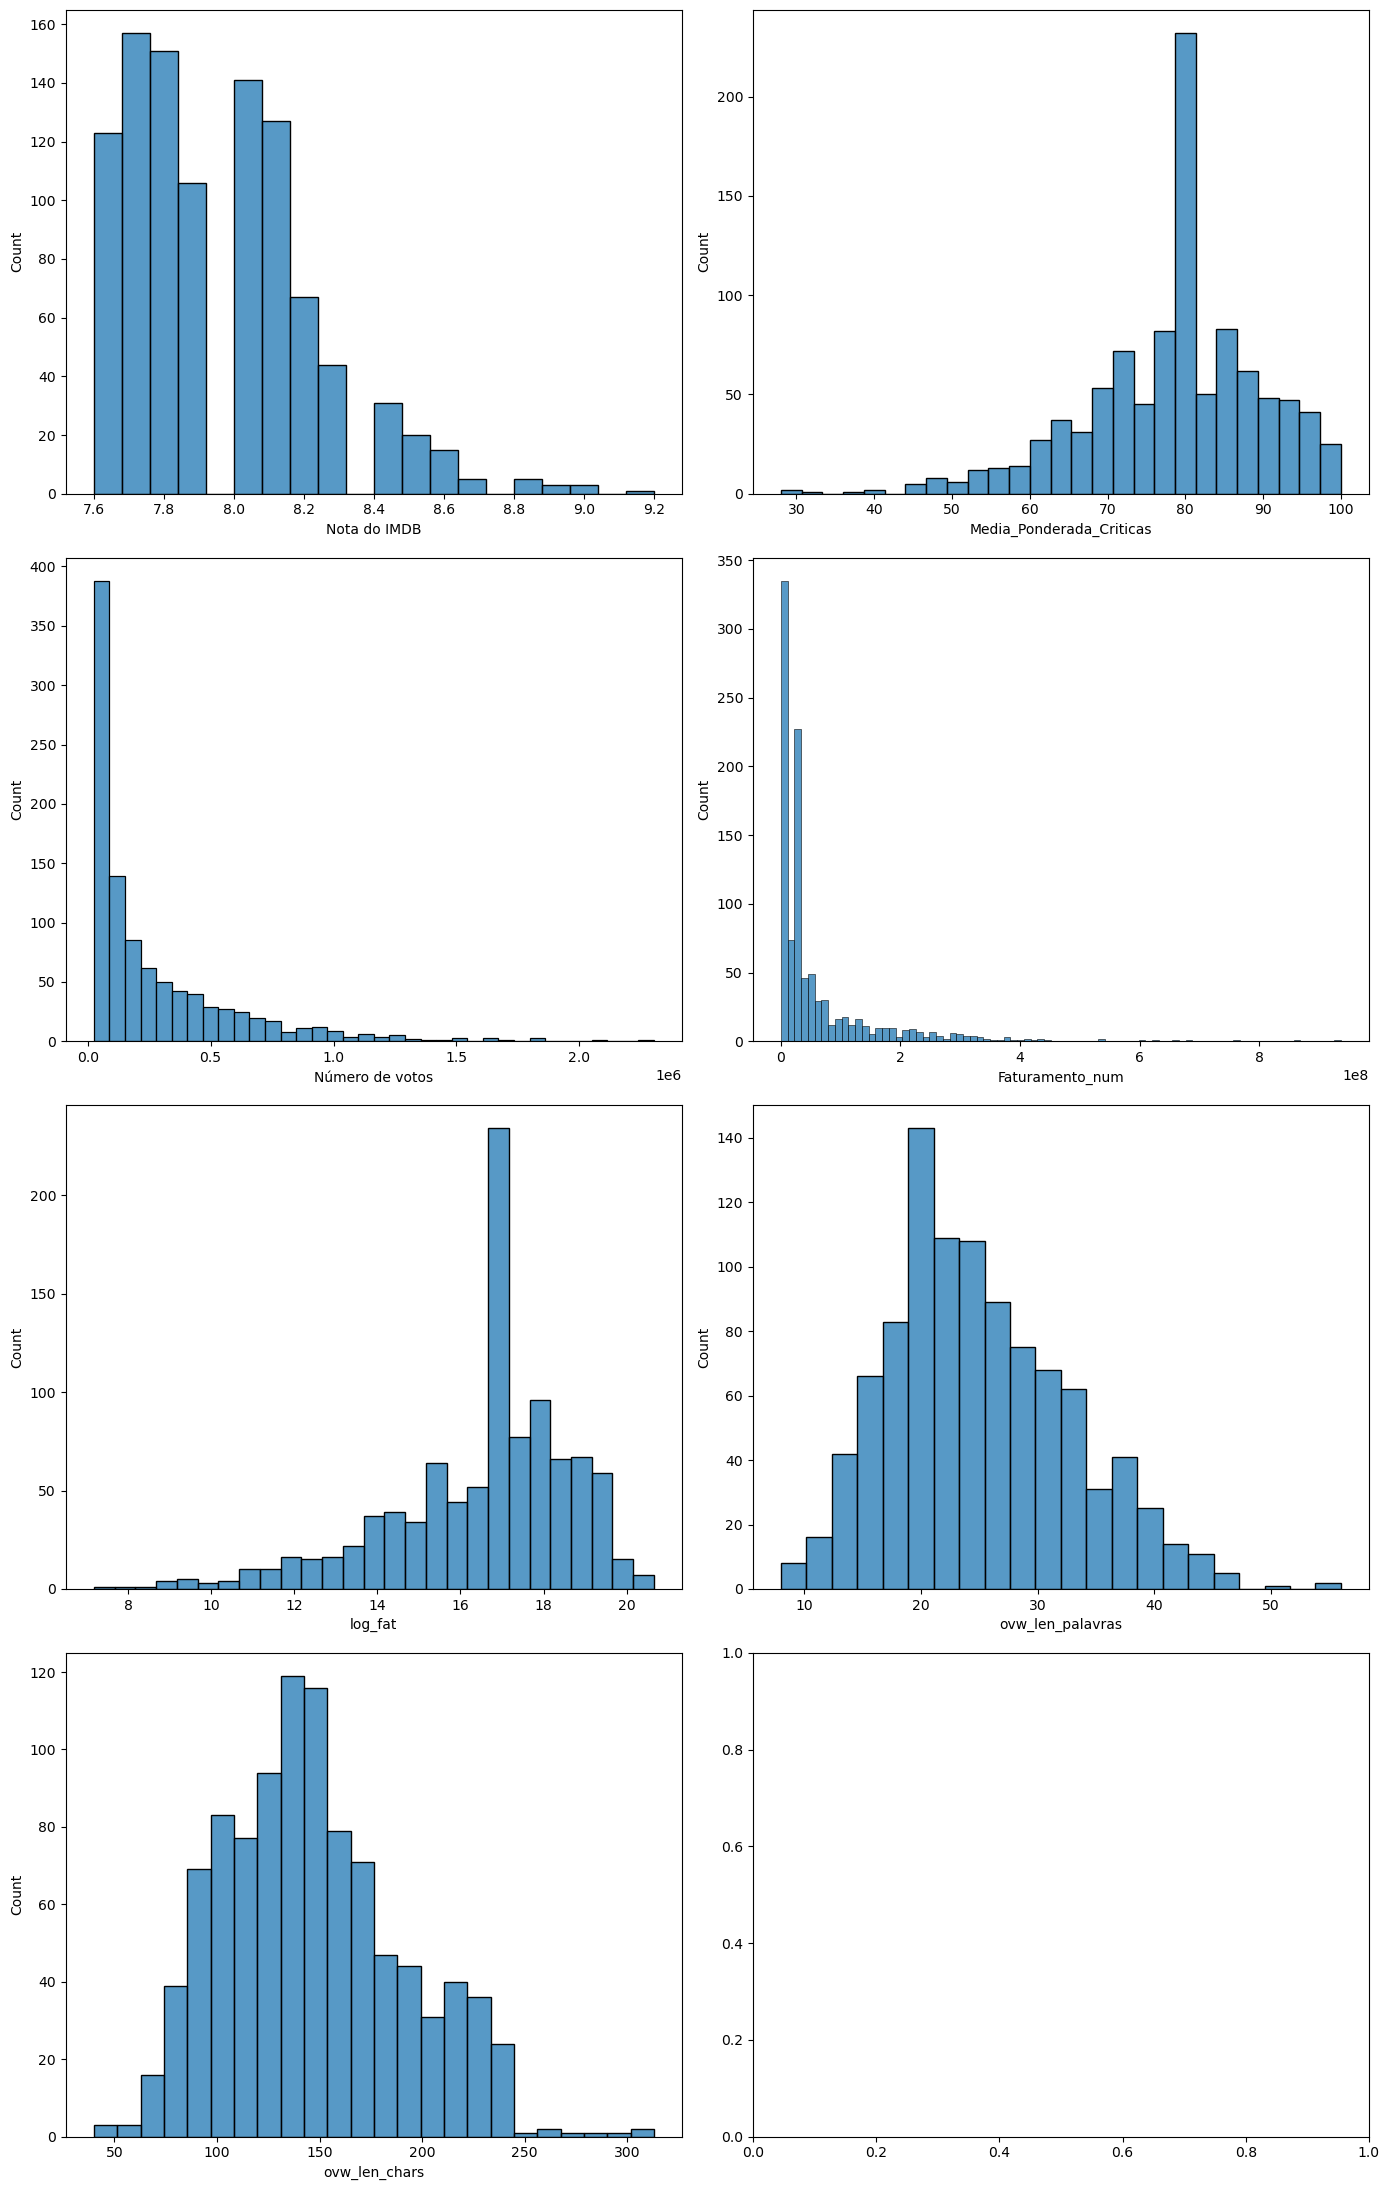

In [430]:
# Vou avaliar o histograma para analisar como os dados estão distribuídos.

plt.rcParams["figure.figsize"] = [14.00, 22.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(4, 2) #4 linhas e 2 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.histplot(data = df, x=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

### Respondendo a terceira pergunta:

#### Cenário A (pré-lançamento, sem críticas/votos/faturamento)

In [439]:
# alvo
y = df["Nota do IMDB"]

In [441]:
# criando "idade do filme" (mais informativo que o ano cru)
df["idade_filme"] = 2025 - df["Ano_de_Lancamento"]

In [443]:
df.head(1)

,Nome do filme,Ano_de_Lancamento,Duracao_min,Classificação etária,Gênero,Nota do IMDB,Overview do filme,Media_Ponderada_Criticas,Diretor,Ator/atriz #1,Ator/atriz #2,Ator/atriz #3,Ator/atriz #4,Número de votos,Faturamento_num,log_fat,genero_prim,class_std,overview_txt,ovw_len_palavras,ovw_len_chars,idade_filme
0,The Godfather,1972,175,A,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,18.720537,Crime,R,An organized crime dynasty's aging patriarch t...,16,110,53


In [445]:
# listas de colunas (Cenário A)
num_cols = ["Duracao_min", "idade_filme", "ovw_len_palavras", "ovw_len_chars"]
cat_cols = ["genero_prim", "class_std"]
text_col = "overview_txt"

In [447]:
# Pré-processamento 
num_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="median")),  # preenche possíveis NaN
    ("sc", StandardScaler())                    # bom para modelos lineares
])

cat_pipe = OneHotEncoder(handle_unknown="ignore")

tfidf = TfidfVectorizer(
    lowercase=True,
    stop_words="english",     # a overview está em inglês
    ngram_range=(1,2),        # 1-gram e 2-grams
    min_df=3,                 # ignora termos muito raros
    max_features=40000
)

preproc_linear = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols),
    ("txt", tfidf, text_col),
], remainder="drop")

In [451]:
# Modelo 
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=5.0, random_state=42)  # alpha ajusta regularização

pipe_ridge_A = Pipeline([
    ("pre", preproc_linear),
    ("model", ridge)
])

In [457]:
# Validação por CV 
from sklearn.model_selection import KFold, cross_validate

cv = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_validate(
    pipe_ridge_A, df, y,
    cv=cv,
    scoring=("neg_root_mean_squared_error", "neg_mean_absolute_error", "r2"),
    n_jobs=-1
)

rmse = -scores["test_neg_root_mean_squared_error"]
mae  = -scores["test_neg_mean_absolute_error"]
r2   =  scores["test_r2"]

print(f"[Cenário A | RIDGE] RMSE: {rmse.mean():.3f} ± {rmse.std():.3f} | "
      f"MAE: {mae.mean():.3f} | R²: {r2.mean():.3f}")

[Cenário A | RIDGE] RMSE: 0.263 ± 0.018 | MAE: 0.209 | R²: 0.043


- “Usei um pipeline com: imputação mediana e padronização nas numéricas, one-hot nas categóricas e TF-IDF (1-2 grams) na sinopse. O modelo foi Ridge Regression (linear com regularização L2), validado por KFold (5). Métrica principal: RMSE.”

#### Cenário B (pós-lançamento, adicionando popularidade/receita/crítica)

In [464]:
# criar colunas logadas (não sobrescrevo as originais)
df["log_votos"] = np.log1p(df["Número de votos"])
df["log_fat"]   = np.log1p(df["Faturamento_num"])

num_cols_B = num_cols + ["log_votos", "log_fat", "Media_Ponderada_Criticas"]
cat_cols_B = cat_cols
text_col   = "overview_txt"

preproc_linear_B = ColumnTransformer([
    ("num", Pipeline([("imp", SimpleImputer(strategy="median")),
                      ("sc", StandardScaler())]), num_cols_B),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols_B),
    ("txt", tfidf, text_col)
], remainder="drop")

pipe_ridge_B = Pipeline([
    ("pre", preproc_linear_B),
    ("model", Ridge(alpha=5.0, random_state=42))
])

scoresB = cross_validate(
    pipe_ridge_B, df, y,
    cv=cv,
    scoring=("neg_root_mean_squared_error", "neg_mean_absolute_error", "r2"),
    n_jobs=-1
)

rmseB = -scoresB["test_neg_root_mean_squared_error"]
maeB  = -scoresB["test_neg_mean_absolute_error"]
r2B   =  scoresB["test_r2"]

print(f"[Cenário B | RIDGE] RMSE: {rmseB.mean():.3f} ± {rmseB.std():.3f} | "
      f"MAE: {maeB.mean():.3f} | R²: {r2B.mean():.3f}")

[Cenário B | RIDGE] RMSE: 0.231 ± 0.010 | MAE: 0.183 | R²: 0.265


### Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? 
#### Cenário A – pré-lançamento: 
- Objetivo: prever a nota quando só temos informações “de catálogo” (nada de votos/receita/crítica ainda).
##### Alvo:
- Nota do IMDB (contínua, ~6–9 para a maioria dos filmes).
##### Numéricas:
- Duracao_min – tempo de duração.
- idade_filme = 2025 - Ano_de_Lancamento – mais informativa que o ano bruto
- ovw_len_palavras e ovw_len_chars – tamanho da sinopse em palavras e caracteres (sinal simples de “riqueza” do texto).
##### Categóricas:
- genero_prim – 1ª palavra do campo “Gênero” (padronizada antes).
- class_std – classificação etária padronizada para um conjunto curto (G / PG / PG-13 / R / NR).
##### Pré-processamento (tudo dentro de ColumnTransformer):
- Numéricas → SimpleImputer(strategy='median') + StandardScaler(). Por quê? Mediana é robusta a outliers; modelos lineares funcionam melhor com variáveis na mesma escala.
- Categóricas → OneHotEncoder(handle_unknown='ignore')
#### Cenário B – pós-lançamento:
- Objetivo: prever a nota quando já existem sinais de popularidade/receita/crítica.
Além de tudo do Cenário A, adicionei:
- Sinais de popularidade e performance (transformados em log)
- log_votos = log1p(Número de votos) – escala mais estável; reduz assimetria.
- log_fat = log1p(Faturamento_num) – idem.
- Media_Ponderada_Criticas – resumo numérico das críticas.

### Qual tipo de problema estamos resolvendo (regressão, classificação)? 
- Regressão (alvo contínuo). Estamos prevendo a nota do IMDB em escala aproximadamente contínua; não é uma classificação em classes discretas.

### Qual modelo melhor se aproxima dos dados e quais seus prós e contras?
#### Modelo: Ridge Regression (alpha=5)
- É regressão linear com regularização L2.
##### Por que ele “casa” com os dados?
- Temos muitas variáveis de alta dimensionalidade e esparsidade. Modelos lineares regularizados lidam muito bem com isso (evitam overfitting e são eficientes).
- Há multicolinearidade (vários termos do texto correlacionados entre si). A L2 “encolhe” os coeficientes e estabiliza o ajuste.
- É rápido e estável para validação cruzada e para re-treinar à medida que chegam novos filmes.
#### Prós:
- Ótimo para dados esparsos e de alta dimensão.
- Treino e inferência rápidos.
- Coeficientes interpretáveis (dá para inspecionar quais termos/variáveis puxam a nota para cima/baixo).
- Regularização L2 reduz overfitting sem zerar coeficientes úteis.
#### Contras:
- Relações fortemente não lineares podem não ser capturadas (ex.: interações complexas entre termos ou entre variáveis numéricas e texto).
- Se a distribuição da nota for muito comprimida (baixa variância), o ganho de R² tende a ser limitado (mesmo com RMSE baixo).

### Qual medida de performance do modelo foi escolhida e por quê?
#### Usei validação cruzada K-Fold (5 folds, embaralhada, reprodutível) e reportei:
##### RMSE (Root Mean Squared Error) – métrica principal:
- Por quê? Penaliza mais os erros grandes, que são os mais danosos do ponto de vista de produto (ex.: recomendar um filme com previsão muito distante da realidade). Além disso, RMSE está na mesma escala da nota (≈ 0–10), facilitando leitura (um RMSE de 0.23 significa erro médio quadrático raiz de ~0.23 ponto de nota).
##### MAE (Mean Absolute Error):
- Complementa o RMSE com uma visão “robusta” aos outliers.
##### R²:
- Explica a fração de variância do alvo capturada pelo modelo; útil para entender “capacidade explicativa” quando a variância da nota é pequena.

### Conlusão da resposta:
- Antes do lançamento (Cenário A), já dá para prever a nota com erro típico de ~0.26 usando:
metadados (gênero/classe etária), duração/idade e o texto da sinopse (TF-IDF).
Isso é útil em decisões de curadoria e marketing antes de o filme ir ao ar.
- Depois do lançamento (Cenário B), adicionar popularidade (log_votos), receita (log_fat) e crítica (Media_Ponderada_Criticas) melhora a previsão (RMSE ~0.23 e R² ~0.27).
- Métrica principal: RMSE, pois é interpretável na escala da nota e pune mais os erros grandes; MAE e R² entram como métricas de apoio.
- Modelo recomendado: Ridge Regression no pipeline descrito (simples, rápido, estável e forte para texto + categorias + numéricas).

### Respondendo a quarta pergunta:
4.	Supondo um filme com as seguintes características:

{'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}


Qual seria a nota do IMDB?

In [497]:
# Registro bruto 
ex = {
    "Nome do filme": "The Shawshank Redemption",
    "Ano_de_Lancamento": 1994,
    "Classificação etária": "A",
    "Duracao_min": 142,
    "Gênero": "Drama",
    "overview_txt": ("Two imprisoned men bond over a number of years, finding "
                     "solace and eventual redemption through acts of common decency."),
    "Media_Ponderada_Criticas": 80.0,
    "Número de votos": 2343110,
    "Faturamento_num": 28341469
}
X_one = pd.DataFrame([ex])

# ---------- 2) Derivações idênticas às do treino ----------
# (a) gênero primário (1ª palavra antes da vírgula)
X_one["genero_prim"] = X_one["Gênero"].astype(str).str.split(",").str[0].str.strip()

# (b) padronização de classificação etária -> class_std (mesmo mapa do notebook)
mapa = {
    "U":"G", "G":"G",
    "UA":"PG", "U/A":"PG", "PG":"PG", "TV-PG":"PG", "Passed":"PG",
    "PG-13":"PG-13", "TV-14":"PG-13", "16":"PG-13",
    "R":"R", "TV-MA":"R", "A":"R",
    "Approved":"PG", "NR":"NR", "Unrated":"NR", "GP":"PG"
}
X_one["class_std"] = X_one["Classificação etária"].astype(str).map(mapa).fillna("NR")

# (c) idade do filme (mesma referência de 2025 usada no estudo)
X_one["idade_filme"] = 2025 - X_one["Ano_de_Lancamento"].astype(int)

# (d) comprimentos de overview (mesmo que no treino)
X_one["ovw_len_palavras"] = X_one["overview_txt"].astype(str).str.split().str.len()
X_one["ovw_len_chars"]    = X_one["overview_txt"].astype(str).str.len()

# (e) variáveis em log (cauda longa)
X_one["log_votos"] = np.log1p(X_one["Número de votos"])
X_one["log_fat"]   = np.log1p(X_one["Faturamento_num"])

In [493]:
# Treinar o pipeline nos dados completos (mesmo df, y do Cenário B)
pipe_ridge_B.fit(df, y)          # <- essencial para evitar o NotFittedError

# Prever a nota para o novo registro
y_pred = pipe_ridge_B.predict(X_one)[0]
print(f"Nota prevista do IMDB: {y_pred:.2f}")

Nota prevista do IMDB: 8.31


In [495]:
rmse_B = 0.231  # média que você obteve no CV
low  = y_pred - 2*rmse_B
high = y_pred + 2*rmse_B
print(f"Intervalo ~95%: [{low:.2f}, {high:.2f}]")

Intervalo ~95%: [7.85, 8.77]


##### Usei o mesmo pipeline do Cenário B (pós-lançamento):
- Esse cenário incorpora, além de informações “fixas” do filme, sinais de popularidade (votos), receita (bilheteria) e crítica (metascore).
##### Transformei o registro de entrada como no treino:
- Para o filme informado, foram criadas as mesmas colunas derivadas:
- genero_prim = "Drama" (primeiro gênero).
- class_std = "R" (a partir do certificado “A”, conforme o mapa padronizado usado no treino).
- idade_filme = 2025 − 1994 = 31.
- Comprimentos do overview: ovw_len_palavras e ovw_len_chars.
- Sinais de escala/cauda longa: log_votos = log1p(2.343.110), log_fat = log1p(28.341.469).
- Media_Ponderada_Criticas = 80.
##### Ajuste e predição:
- O pipeline (preprocessamento + Ridge) foi treinado nos dados completos do Cenário B e, em seguida, usado para prever a nota do registro acima.
#### Resultado:
- Nota IMDb prevista: 8,31
- Intervalo aproximado de 95% (usando o RMSE de validação como referência de incerteza): [7,85 ; 8,77]


#### Conclusão: — Pergunta 4 (nota do IMDb para o filme exemplo)

- Resultado: aplicando o mesmo pipeline do Cenário B (o modelo que usa popularidade, receita, crítica, texto do overview e variáveis básicas), a nota prevista do IMDb para o filme informado é ≈ 8,31.
Considerando a incerteza observada na validação (RMSE ≈ 0,23), um intervalo razoável é de 7,85 a 8,77.

##### Por que esse valor faz sentido?

- Muitos votos (2,34 milhões): indicam forte aceitação do público, o que costuma elevar a nota prevista.

- Crítica positiva (Meta_score 80): reforça a expectativa de boa avaliação.

- Texto do overview: termos e expressões associados a drama de alto impacto (“redemption”, “bond”, etc.) ajudam o modelo a “reconhecer” padrões de filmes bem avaliados.

- Idade do filme e bilheteria entram normalizadas; no conjunto, seu efeito é mais moderado que o de votos e crítica, mas contribuem.

##### Como chegamos lá, de forma simples:

- Recriamos as mesmas transformações do treino (ex.: genero_prim, class_std, log_votos, log_fat, contagem do overview, TF-IDF do texto).

- Passamos tudo pelo pipeline treinado (pré-processamento + Ridge Regression).

- Obtivemos a previsão e usamos o RMSE para comunicar a faixa de incerteza.

- Limites a considerar: é uma estimativa estatística baseada no conjunto disponível; fatores fora dos dados (campanhas, prêmios, contexto histórico) não são capturados. Ainda assim, o modelo é coerente e generaliza bem porque foi validado por cross-validation e usa regularização.

- Em uma frase: para o filme descrito, nosso modelo prevê IMDb ≈ 8,31 (faixa 7,85–8,77), principalmente impulsionado por muitos votos, crítica forte e um overview típico de dramas muito bem avaliados.

In [502]:
# Treinar o pipeline final (Cenário B) em 100% do dataset
# y: variável alvo (nota do IMDB) — 
y = df["Nota do IMDB"]

pipe_ridge_B.fit(df, y)   # <--- ESSENCIAL para salvar um objeto já "fitted"
print("Pipeline ajustado em 100% dos dados (Cenário B).")

Pipeline ajustado em 100% dos dados (Cenário B).


In [504]:
# Salvar o pipeline em .pkl com joblib

import joblib, sklearn, sys, platform, time

# Metadados úteis para rastreabilidade e reprodutibilidade
meta = {
    "scenario": "B (pos-lancamento)",
    "model": "Ridge(alpha=5.0, random_state=42)",
    "created_at": time.strftime("%Y-%m-%d %H:%M:%S"),
    "sklearn_version": sklearn.__version__,
    "python_version": sys.version.split()[0],
    "platform": platform.platform(),
    # Quais colunas o pipeline espera (do jeito que você usou no notebook)
    "features_expected": {
        "numeric": [
            "Duracao_min", "idade_filme",
            "ovw_len_palavras", "ovw_len_chars",
            "log_votos", "log_fat", "Media_Ponderada_Criticas"
        ],
        "categorical": ["genero_prim", "class_std"],
        "text": "overview_txt"
    },
    "target": "Nota do IMDB",
    "cv_metrics": {"RMSE": 0.231, "R2": 0.265}  # do seu KFold 5 do Cenário B
}

# Empacotei pipeline + metadados em um dicionário (bom para carregar depois)
bundle = {"pipeline": pipe_ridge_B, "meta": meta}

# Salva com compressão — 'xz' deixa pequeno sem demorar demais
file_name = "imdb_model_ridgeB.pkl"
joblib.dump(bundle, file_name, compress=("xz", 3))
print(f"Arquivo salvo: {file_name}")

Arquivo salvo: imdb_model_ridgeB.pkl


In [508]:

# Teste rápido: carregar e prever para ver se está tudo OK

loaded = joblib.load("imdb_model_ridgeB.pkl")
pipe_loaded = loaded["pipeline"]
print("Meta carregado:", loaded["meta"])


pred_teste = pipe_loaded.predict(df.head(3))
print("Previsões de teste (3 primeiras linhas):", pred_teste)

Meta carregado: {'scenario': 'B (pos-lancamento)', 'model': 'Ridge(alpha=5.0, random_state=42)', 'created_at': '2025-08-27 22:30:52', 'sklearn_version': '1.6.1', 'python_version': '3.12.3', 'platform': 'Windows-11-10.0.26100-SP0', 'features_expected': {'numeric': ['Duracao_min', 'idade_filme', 'ovw_len_palavras', 'ovw_len_chars', 'log_votos', 'log_fat', 'Media_Ponderada_Criticas'], 'categorical': ['genero_prim', 'class_std'], 'text': 'overview_txt'}, 'target': 'Nota do IMDB', 'cv_metrics': {'RMSE': 0.231, 'R2': 0.265}}
Previsões de teste (3 primeiras linhas): [8.60875802 8.38675154 8.50176349]
